In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
import tqdm
from datetime import datetime
from scipy.stats import norm
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [46]:
def binomapprox(x, n, p):
    return norm(loc=n*p, scale=np.sqrt(n*p*(1-p))).cdf(x-0.5)    

In [47]:
def p_ell(beta, k, n):
    return np.power(beta, n) * (1-binomapprox(0.4 * k, n*k, beta))

In [16]:
19000 * 0.1

1900.0

In [13]:
0.4 * 19000

7600.0

In [49]:
np.power(0.15, 3), 1-binomapprox(7600, 3*19000, 0.15)

(0.0033749999999999995, 1.0)

In [63]:
betas = np.arange(0.1, 0.5, 0.001)
res_ell_1 = np.asarray([p_ell(beta, k=19000, n=1) for beta in betas])
res_ell_2 = np.asarray([p_ell(beta, k=19000, n=2) for beta in betas])
res_ell_3 = np.asarray([p_ell(beta, k=19000, n=3) for beta in betas])
res_ell_4 = np.asarray([p_ell(beta, k=19000, n=4) for beta in betas])

In [69]:
total = res_ell_1 + res_ell_2 + res_ell_3 + res_ell_4

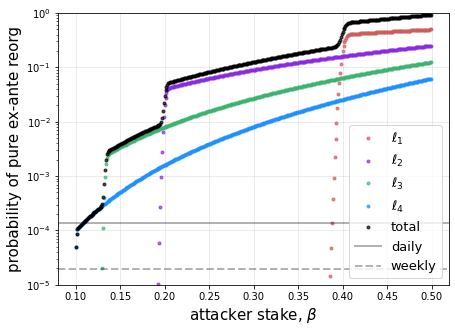

In [79]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(betas, res_ell_1, '.', color='indianred', linewidth=4, alpha=0.7, label='$\ell_1$')
ax.plot(betas, res_ell_2, '.', color='blueviolet', linewidth=4, alpha=0.7, label='$\ell_2$')
ax.plot(betas, res_ell_3, '.', color='mediumseagreen', linewidth=4, alpha=0.7, label='$\ell_3$')
ax.plot(betas, res_ell_4, '.', color='dodgerblue', linewidth=4, alpha=0.7, label='$\ell_4$')

ax.plot(betas, total, '.', color='black', linewidth=4, alpha=0.7, label='total')

ax.set_yscale('log')

ax.axhline(1/7200, label="daily", color='k', linewidth=2, alpha=0.3)
ax.axhline(1/50400, linestyle='--', label="weekly", color='k', linewidth=2, alpha=0.3)
# ax.axhline(1/2628000, linestyle='-.', label="yearly", color='k', linewidth=2, alpha=0.3)

# ax.set_xlabel('honest validator proportion', size=14)
# ax.set_ylabel('probability of a malicious committee', size=14)
ax.set_ylim(float(1e-5), 1)
plt.legend(prop={'size': 13})
ax.set_ylabel('probability of pure ex-ante reorg', size=15)
ax.set_xlabel(r'attacker stake, $\beta$', size=15)
plt.show()

In [80]:
def p_ell_epbs(beta, k, n):
    return np.power(beta, n) * (1-binomapprox(0.2 * k, n*k, beta))

In [81]:
betas = np.arange(0.1, 0.5, 0.001)
res_ell_1 = np.asarray([p_ell_epbs(beta, k=19000, n=1) for beta in betas])
res_ell_2 = np.asarray([p_ell_epbs(beta, k=19000, n=2) for beta in betas])
res_ell_3 = np.asarray([p_ell_epbs(beta, k=19000, n=3) for beta in betas])
res_ell_4 = np.asarray([p_ell_epbs(beta, k=19000, n=4) for beta in betas])

In [82]:
total = res_ell_1 + res_ell_2 + res_ell_3 + res_ell_4

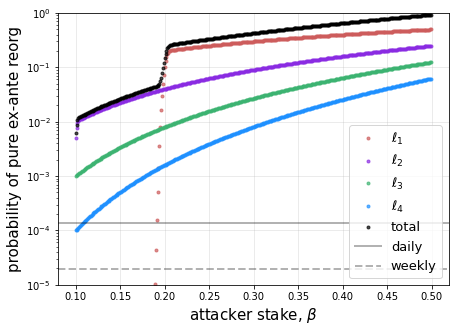

In [83]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(betas, res_ell_1, '.', color='indianred', linewidth=4, alpha=0.7, label='$\ell_1$')
ax.plot(betas, res_ell_2, '.', color='blueviolet', linewidth=4, alpha=0.7, label='$\ell_2$')
ax.plot(betas, res_ell_3, '.', color='mediumseagreen', linewidth=4, alpha=0.7, label='$\ell_3$')
ax.plot(betas, res_ell_4, '.', color='dodgerblue', linewidth=4, alpha=0.7, label='$\ell_4$')

ax.plot(betas, total, '.', color='black', linewidth=4, alpha=0.7, label='total')

ax.set_yscale('log')

ax.axhline(1/7200, label="daily", color='k', linewidth=2, alpha=0.3)
ax.axhline(1/50400, linestyle='--', label="weekly", color='k', linewidth=2, alpha=0.3)
# ax.axhline(1/2628000, linestyle='-.', label="yearly", color='k', linewidth=2, alpha=0.3)

# ax.set_xlabel('honest validator proportion', size=14)
# ax.set_ylabel('probability of a malicious committee', size=14)
ax.set_ylim(float(1e-5), 1)
plt.legend(prop={'size': 13})
ax.set_ylabel('probability of pure ex-ante reorg', size=15)
ax.set_xlabel(r'attacker stake, $\beta$', size=15)
plt.show()

In [91]:
betas = np.arange(0.05, 0.5, 0.001)

pres = np.zeros(len(betas))
posts = np.zeros(len(betas))
for i in range(1,10):
    pres += np.asarray([p_ell(beta, k=19000, n=i) for beta in betas])
    posts += np.asarray([p_ell_epbs(beta, k=19000, n=i) for beta in betas])

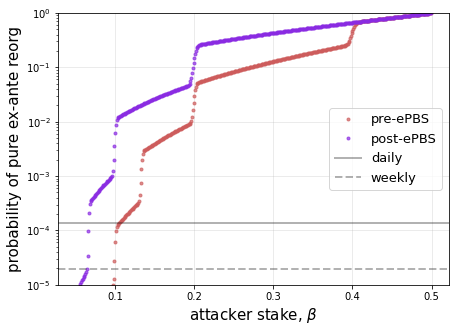

In [96]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(betas, pres, '.', color='indianred', linewidth=4, alpha=0.7, label='pre-ePBS')
ax.plot(betas, posts, '.', color='blueviolet', linewidth=4, alpha=0.7, label='post-ePBS')
# ax.plot(betas, posts-pres, '.', color='black', linewidth=4, alpha=0.7, label='delta')

ax.set_yscale('log')

ax.axhline(1/7200, label="daily", color='k', linewidth=2, alpha=0.3)
ax.axhline(1/50400, linestyle='--', label="weekly", color='k', linewidth=2, alpha=0.3)
# ax.axhline(1/2628000, linestyle='-.', label="yearly", color='k', linewidth=2, alpha=0.3)

ax.set_ylim(float(1e-5), 1)
plt.legend(prop={'size': 13})
ax.set_ylabel('probability of pure ex-ante reorg', size=15)
ax.set_xlabel(r'attacker stake, $\beta$', size=15)
plt.show()